In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import datetime

%matplotlib inline

import seaborn as sns

import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

pd.options.display.max_colwidth = 200
pd.options.display.max_rows=100
pd.options.display.max_columns=500

import warnings
warnings.filterwarnings('ignore')

In [135]:
data = pd.read_csv('train.csv')

In [136]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [137]:
data.shape

(1168, 81)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [139]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,724.136130,416.159877,1.0,360.50,714.5,1079.5,1460.0
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.0,190.0
LotFrontage,954.0,70.988470,24.828750,21.0,60.00,70.0,80.0,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.5,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.0,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.0,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.0,2010.0
MasVnrArea,1161.0,102.310078,182.595606,0.0,0.00,0.0,160.0,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.5,5644.0


In [140]:
NA_col = data.isnull().sum()
NA_col = NA_col[NA_col > 0]
print(round(100*NA_col[NA_col > 0]/len(data),2))

LotFrontage     18.32
Alley           93.41
MasVnrType       0.60
MasVnrArea       0.60
BsmtQual         2.57
BsmtCond         2.57
BsmtExposure     2.65
BsmtFinType1     2.57
BsmtFinType2     2.65
FireplaceQu     47.17
GarageType       5.48
GarageYrBlt      5.48
GarageFinish     5.48
GarageQual       5.48
GarageCond       5.48
PoolQC          99.40
Fence           79.71
MiscFeature     96.23
dtype: float64


In [141]:
data.drop(['Id','LotFrontage','Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature', 'MoSold','Street', 'Utilities'], axis=1, inplace = True)

In [142]:
data.shape

(1168, 71)

In [143]:
NA_col = data.isnull().sum()
NA_col = NA_col[NA_col > 0]

print(round(100*NA_col[NA_col > 0]/len(data),2))

MasVnrType      0.60
MasVnrArea      0.60
BsmtQual        2.57
BsmtCond        2.57
BsmtExposure    2.65
BsmtFinType1    2.57
BsmtFinType2    2.65
GarageType      5.48
GarageYrBlt     5.48
GarageFinish    5.48
GarageQual      5.48
GarageCond      5.48
dtype: float64


In [144]:
data['YearBuilt_Age'] = data['YearBuilt'].max() - data['YearBuilt']
data['YearRemodAdd_Age'] = data['YearRemodAdd'].max() - data['YearRemodAdd']
data['YrSold_Age'] = data['YrSold'].max() - data['YrSold']
data['GarageYrBlt_Age'] = data['GarageYrBlt'].max() - data['GarageYrBlt']


data.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [145]:
data[['YearBuilt_Age','YearRemodAdd_Age','YrSold_Age','GarageYrBlt_Age']].head(10)

,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,34,34,3,33.0
1,40,40,3,40.0
2,14,13,3,13.0
3,33,33,0,33.0
4,33,10,1,33.0
5,4,4,4,4.0
6,53,14,0,53.0
7,53,10,4,53.0
8,45,45,3,45.0
9,63,60,2,63.0


In [146]:
def treat_Missing_Values(df):    
    
    NA_col = df.isnull().sum()
    
    NA_col = NA_col[NA_col > 0]

    for col in NA_col.index:
        if df[col].dtype.name == 'object':
            df[col].fillna(data[col].mode()[0], inplace=True)
            
        elif df[col].dtype.name == 'float64' or df[col].dtype.name == 'int64' or df[col].dtype.name == 'int32':
            df[col] = df[col].fillna((df[col].median()))
            
        else:
            print('Unable to detect the datatype for col - ', col)
            
    return df

In [147]:
data = treat_Missing_Values(data)

In [148]:
round(data.isnull().sum()/len(data.index),2)[round(data.isnull().sum()/ len(data.index),2).values>0.00]

Series([], dtype: float64)

4. EDA - find the variables which are significant to the target variable

Heatmap


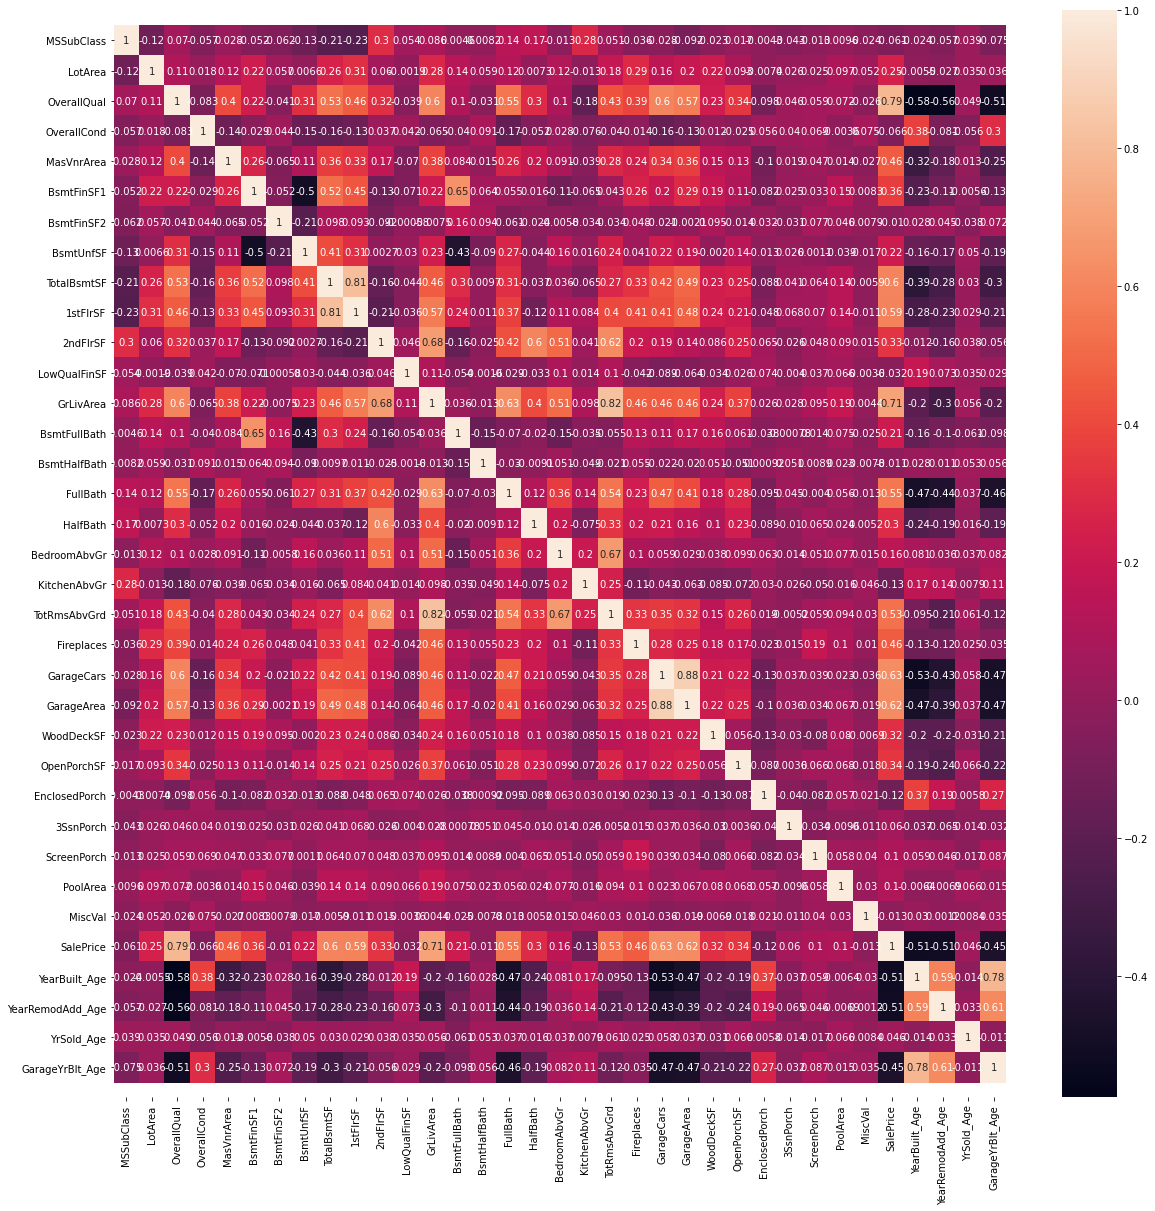

In [149]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), 
            xticklabels=data.corr().columns.values,
            yticklabels=data.corr().columns.values,annot= True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [150]:
corr_val = data[list(data.dtypes[data.dtypes != 'object'].index)].corr()

In [151]:
corr_coef = corr_val[corr_val['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [idx for idx in corr_coef.index]

OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
TotalBsmtSF     0.595042
1stFlrSF        0.587642
FullBath        0.554988
TotRmsAbvGrd    0.528363
Name: SalePrice, dtype: float64


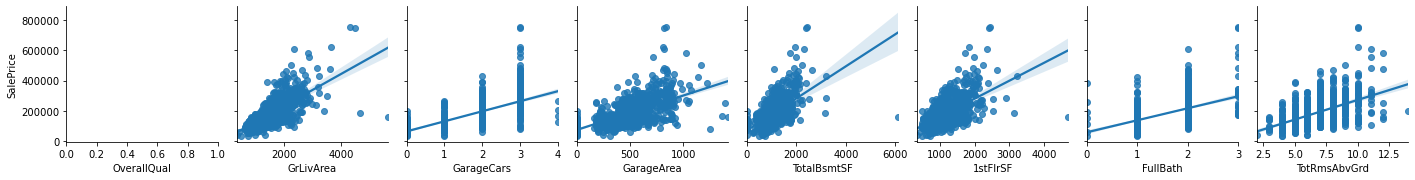

In [152]:
sns.pairplot(data, x_vars=corr_coef_cols[1:], y_vars=[corr_coef_cols[0]], kind="reg")

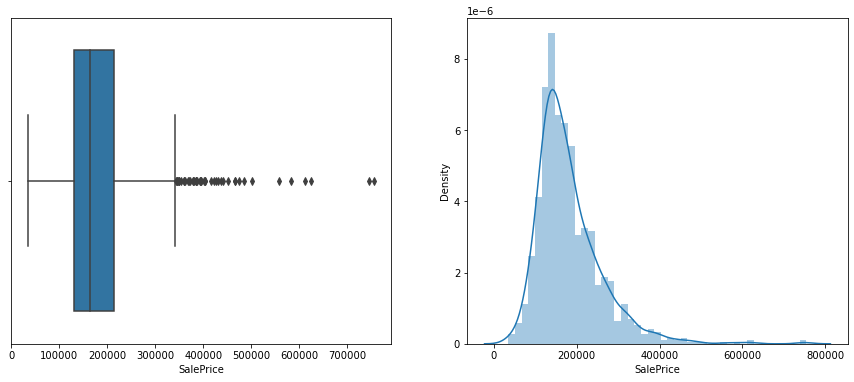

In [153]:
f, axes = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(data['SalePrice'],  orient='v' , ax=axes[0])
sns.distplot(data['SalePrice'], ax=axes[1])
plt.show()

SalePrice is right skewed

5. Feature engineering

Label Encoding

In [154]:
def label_encoding(colNames):
    for colName in colNames:
        unique_vals = data[colName].unique()
        map_vals = {}
        for idx, val in enumerate(unique_vals):
            map_vals[val] = idx
        data[colName] = data[colName].map(map_vals)

In [155]:
cat_col_list = ['LandSlope', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 
                'GarageFinish', 'GarageQual', 'GarageCond', 'ExterCond', 'LotShape']
label_encoding(cat_col_list)

In [156]:
data[cat_col_list].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,1,1,0,1,1,0,0,1,0
2,0,1,0,0,2,1,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,2,0,1,2,0,0,0,0


One Hot Encoding

In [157]:
dummy_col_names = ['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']

dummies = pd.get_dummies(data[dummy_col_names], drop_first = True)
data = pd.concat([data, dummies], axis = 1)
data.drop(dummy_col_names, axis = 1, inplace = True)

In [158]:
data.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,4928,0,0,6,5,0.0,0,0,0,0,0,0,120,0,0,958,1078,0,0,958,0,0,958,0,0,2,0,2,1,0,5,1,0,2,440,0,0,0,205,0,0,0,0,0,128000,34,34,3,33.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,15865,0,1,8,6,0.0,1,1,1,1,1,0,351,1,823,1043,2217,1,0,2217,0,0,2217,1,0,2,0,4,1,1,8,1,1,2,621,0,0,81,207,0,0,224,0,0,268000,40,40,3,40.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,9920,0,0,7,5,0.0,1,0,0,0,2,1,862,0,0,255,1117,1,0,1127,886,0,2013,1,0,2,1,3,1,

In [159]:
data.shape

(1168, 193)

Target variable transformation

In [160]:
data['SalePrice'] = np.log1p(data['SalePrice'])

6. Model Building

In [161]:
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [162]:
scaler_col = ['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'TotalBsmtSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
              'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[scaler_col] = scaler.fit_transform(df_train[scaler_col])
df_test[scaler_col] = scaler.transform(df_test[scaler_col])

In [163]:
df_train.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
227,-0.292410,-0.580759,1,0,-1.508085,0.395781,-0.564640,0,0,1,0,0,3,-0.994911,0,-0.278136,0.637750,-0.442216,1,0,-0.753512,-0.776351,-0.121615,-1.219019,-0.809275,-0.215829,-1.047650,-0.786890,-2.288905,-0.202266,0,-1.603787,-0.962658,1,-2.372932,-2.237248,0,0,-0.780074,-0.710483,-0.349413,-0.12634,-0.263200,-0.077801,-0.080242,-1.229291,54,54,3,30.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
247,2.430425,-0.929805,1,0,0.608935,-0.515073,-0.564640,1,0,0,0,0,3,-0.994911,0,-0.278136,0.033907,-1.099249,1,0,-1.679883,0.633001,1.504893,-0.573160,-0.809275,-0.215829,0.750523,1.197336,-1.069847,-0.202266,1,-1.603787,-0.962658,0,0.286444,-0.001197,0,0,-0.780074,1.806157,-0.349413,-0.126

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

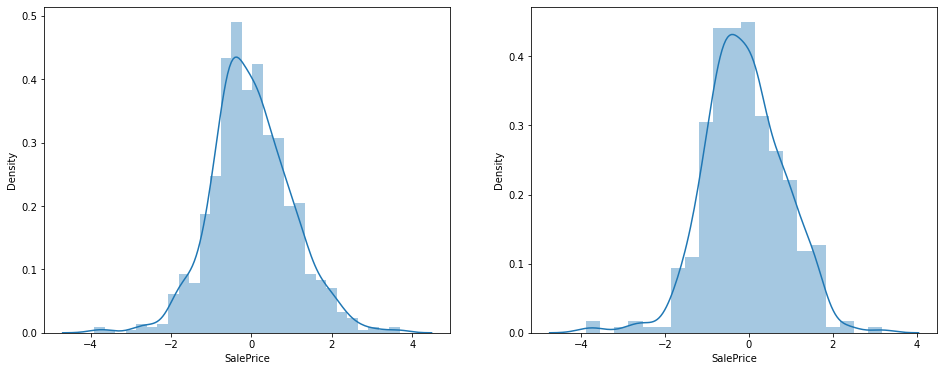

In [164]:

plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [165]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [166]:
# RFE
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [167]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

In [168]:
col = X_train.columns[rfe.support_]

In [169]:
col

Index(['LandSlope', 'OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GarageArea', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac',
       'Neighborhood_BrDale', 'Neighborhood_MeadowV', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRAn', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_CemntBd', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior2nd_CmentBd', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Foundation_Wood', 'Heating_Grav', 'Heating_OthW', 'Functional_Maj2',
       'Functional_Typ', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'SaleType_Con', 'SaleType_New', 'SaleType_Oth',
       'SaleCon

In [170]:
X_train = X_train[col]
X_test = X_test[col]

In [171]:
X_train.shape

(817, 50)

In [172]:
X_test.shape

(351, 50)

Lasso Regression model

In [173]:
#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

# train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8960273595694895
0.7029480907043508


In [174]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col = col.insert(0,'Constant')
list(zip(col,model_parameter))

[('Constant', -1.329),
 ('LandSlope', 0.131),
 ('OverallQual', 0.388),
 ('BsmtFinSF1', 0.069),
 ('BsmtUnfSF', -0.041),
 ('TotalBsmtSF', 0.112),
 ('1stFlrSF', 0.261),
 ('2ndFlrSF', 0.287),
 ('GarageArea', 0.157),
 ('MSZoning_FV', 0.906),
 ('MSZoning_RH', 0.68),
 ('MSZoning_RL', 0.925),
 ('MSZoning_RM', 0.643),
 ('LotConfig_CulDSac', 0.168),
 ('Neighborhood_BrDale', -0.185),
 ('Neighborhood_MeadowV', -0.149),
 ('Neighborhood_StoneBr', 0.032),
 ('Neighborhood_Veenker', 0.139),
 ('Condition1_Norm', 0.169),
 ('Condition1_PosA', 0.0),
 ('Condition1_RRNe', 0.0),
 ('Condition1_RRNn', 0.0),
 ('Condition2_PosN', -1.981),
 ('Condition2_RRAe', -0.0),
 ('Condition2_RRAn', -0.0),
 ('RoofStyle_Shed', -0.0),
 ('RoofMatl_Membran', 0.0),
 ('RoofMatl_Metal', -0.0),
 ('RoofMatl_Roll', -0.0),
 ('RoofMatl_Tar&Grv', 0.0),
 ('RoofMatl_WdShngl', 0.057),
 ('Exterior1st_AsphShn', -0.0),
 ('Exterior1st_CemntBd', 0.0),
 ('Exterior1st_Stone', -0.0),
 ('Exterior1st_Stucco', -0.159),
 ('Exterior2nd_CmentBd', 0.039),


In [175]:
# Gridsearch Operation on Training data set
# Finding optimal value of alpha

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [176]:
cv_result_train_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_train_lasso['param_alpha'] = cv_result_train_lasso['param_alpha'].astype('float32')
cv_result_train_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007600,0.000663,0.002801,0.000401,0.001,{'alpha': 0.001},0.904944,0.529421,0.859358,0.874777,0.900536,0.872625,0.787288,0.907147,0.909645,0.930599,0.847634,0.112585,1,0.895155,0.905992,0.898026,0.897725,0.894866,0.896945,0.905502,0.894615,0.894393,0.893161,0.897638,0.004311
1,0.004901,0.000541,0.002400,0.000490,0.010,{'alpha': 0.01},0.889362,0.524376,0.830937,0.850462,0.877010,0.843016,0.838208,0.903528,0.892431,0.895119,0.834445,0.106369,2,0.849081,0.876167,0.855047,0.852970,0.850741,0.853897,0.855147,0.846599,0.847941,0.847771,0.853536,0.008110
2,0.004810,0.000866,0.002795,0.000591,0.100,{'alpha': 0.1},0.833281,0.575837,0.772098,0.763858,0.822123,0.792586,0.796442,0.823217,0.826136,0.851629,0.785721,0.074731,3,0.796461,0.824527,0.799496,0.801286,0.797023,0.802740,0.797103,0.791884,0.794935,0.796437,0.800189,0.008629
3,0.004814,0.000367,0.002691,0.000458,1.000,{'alpha': 1.0},-0.088008,-0.098041,-0.028063,-0.005633,-0.052834,-0.006318,-0.008095,-0.010623,-0.000063,-0.000316,-0.029799,0.035081,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004596,0.000487,0.002806,0.000411,5.000,{'alpha': 5.0},-0.088008,-0.098041,-0.028063,-0.005633,-0.052834,-0.006318,-0.008095,-0.010623,-0.000063,-0.000316,-0.029799,0.035081,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [177]:
def r2_score(cv_result, is_log=False):
    plt.figure(figsize=(12,6))
    plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
    plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
    if is_log == True:
        plt.xscale('log')
    plt.ylabel('R2 Score')
    plt.xlabel('Alpha')
    plt.show()

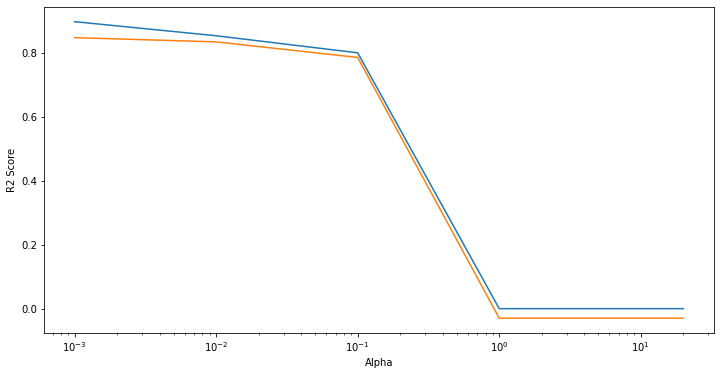

In [178]:
r2_score(cv_result_train_lasso, True)

In [179]:
print('For Lasso, the Best Alpha value = ', model_cv.best_params_['alpha'])

For Lasso, the Best Alpha value =  0.001


We received the above from the training dataset. Now we need to run the model with alpha optimal = 0.001 test dataset and see the results

In [180]:
# Now that we have optimal value of alpha = 0.001, we can use this alpha to run the model again
#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8960273595694895
0.7029480907043508


Lasso Results on Test dataset
---0.70---

Ridge Regression Model

In [181]:
#Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

# train 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))

# test 
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test, y_test_pred))

0.9040743628142599
0.6882013165127056


In [182]:
# Gridsearch Operation on Training data set
# Objective - Find optimal value of alpha

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [183]:
cv_result_train_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_train_ridge['param_alpha'] = cv_result_train_ridge['param_alpha'].astype('float32')
cv_result_train_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005008,0.000633,0.002993,0.000621,0.001,{'alpha': 0.001},0.910268,0.591130,0.870440,0.881563,0.894892,0.880841,0.750047,0.900121,0.885406,0.920760,0.848547,0.096834,5,0.902340,0.913712,0.906568,0.906249,0.902707,0.905405,0.913753,0.902632,0.903820,0.901552,0.905874,0.004246
1,0.004900,0.000700,0.003099,0.000300,0.010,{'alpha': 0.01},0.910237,0.590782,0.870379,0.881553,0.895290,0.880908,0.752881,0.900280,0.886535,0.920952,0.848980,0.096726,4,0.902338,0.913711,0.906566,0.906247,0.902705,0.905403,0.913749,0.902630,0.903817,0.901550,0.905872,0.004246
2,0.004501,0.000500,0.002599,0.000490,0.100,{'alpha': 0.1},0.909921,0.587352,0.869725,0.881396,0.898697,0.881242,0.776707,0.901639,0.894273,0.922508,0.852346,0.096176,2,0.902191,0.913592,0.906413,0.906090,0.902536,0.905231,0.913404,0.902475,0.903573,0.901380,0.905688,0.004224
3,0.006700,0.004498,0.006206,0.010303,1.000,{'alpha': 1.0},0.907467,0.561847,0.863507,0.878558,0.908272,0.875213,0.849123,0.906585,0.906142,0.925101,0.858181,0.101336,1,0.896631,0.909614,0.900730,0.900254,0.896411,0.899375,0.903644,0.896623,0.897024,0.895370,0.899568,0.004132
4,0.005100,0.000538,0.003201,0.000402,5.000,{'alpha': 5.0},0.904814,0.529757,0.853921,0.873046,0.900355,0.860128,0.858611,0.908085,0.906616,0.919519,0.851485,0.109640,3,0.880396,0.899661,0.884773,0.883655,0.880006,0.884106,0.884428,0.879659,0.879834,0.879033,0.883555,0.005779


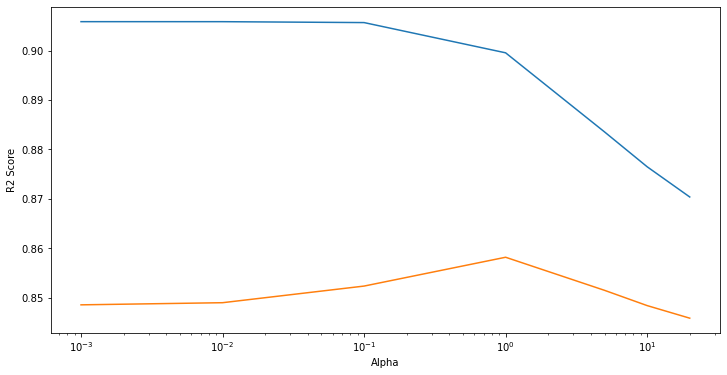

In [184]:
# plot r2_score using the defined function for ridge
r2_score(cv_result_train_ridge, True)

In [185]:
print('For Ridge, the Best Alpha value = ', model_cv.best_params_['alpha'])

For Ridge, the Best Alpha value =  1.0


In [186]:
# Now that we have optimal value of alpha = 0.001, we can use this alpha to run the model again
#Ridge
ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)

# train
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))

# test score
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test, y_test_pred))

0.8764957599092064
0.7110483915844203


In [187]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col = col.insert(0,'Constant')
list(zip(col,model_parameter))

[('Constant', -0.748),
 ('LandSlope', 0.094),
 ('OverallQual', 0.399),
 ('BsmtFinSF1', 0.059),
 ('BsmtUnfSF', -0.046),
 ('TotalBsmtSF', 0.112),
 ('1stFlrSF', 0.252),
 ('2ndFlrSF', 0.276),
 ('GarageArea', 0.157),
 ('MSZoning_FV', 0.272),
 ('MSZoning_RH', 0.092),
 ('MSZoning_RL', 0.327),
 ('MSZoning_RM', 0.037),
 ('LotConfig_CulDSac', 0.165),
 ('Neighborhood_BrDale', -0.118),
 ('Neighborhood_MeadowV', -0.079),
 ('Neighborhood_StoneBr', 0.077),
 ('Neighborhood_Veenker', 0.101),
 ('Condition1_Norm', 0.196),
 ('Condition1_PosA', 0.036),
 ('Condition1_RRNe', 0.03),
 ('Condition1_RRNn', 0.035),
 ('Condition2_PosN', -0.367),
 ('Condition2_RRAe', -0.014),
 ('Condition2_RRAn', -0.02),
 ('RoofStyle_Shed', 0.01),
 ('RoofMatl_Membran', 0.033),
 ('RoofMatl_Metal', -0.002),
 ('RoofMatl_Roll', -0.017),
 ('RoofMatl_Tar&Grv', 0.041),
 ('RoofMatl_WdShngl', 0.09),
 ('Exterior1st_AsphShn', -0.047),
 ('Exterior1st_CemntBd', -0.041),
 ('Exterior1st_Stone', -0.039),
 ('Exterior1st_Stucco', -0.099),
 ('Exterio

Ridge Results on Test dataset

R2 score = 0.71

This is very close to Lasso result as well

In [188]:
def run_multiple_alphas(model,alphas):
    
    feature_ridge_df = pd.DataFrame(columns=['feature'], data=X_train.columns)
    feature_lasso_df = pd.DataFrame(columns=['feature'], data=X_train.columns)
    
    for alpha in alphas:
        if model == 'ridge':
            ridge = Ridge(alpha=alpha)
            ridge.fit(X_train, y_train)
            feature_ridge_df['Alpha: '+str(alpha)] = ridge.coef_    #for futureuse
        elif model == 'lasso':
            lasso = Lasso(alpha=alpha)
            lasso.fit(X_train, y_train)
            feature_lasso_df['Alpha: '+str(alpha)] = lasso.coef_
    
    if model == 'ridge':
        return feature_ridge_df
    else:
        return feature_lasso_df

In [189]:
lasso_df = run_multiple_alphas('lasso',[0.001,0.002,0.01,0.02,0.05,5])

In [190]:
lasso_df.head()

,feature,Alpha: 0.001,Alpha: 0.002,Alpha: 0.01,Alpha: 0.02,Alpha: 0.05,Alpha: 5
0,LandSlope,0.131041,0.094352,0.000000,0.000000,0.000000,-0.0
1,OverallQual,0.388223,0.402306,0.441863,0.459611,0.467682,0.0
2,BsmtFinSF1,0.069045,0.067546,0.092107,0.083690,0.067549,0.0
3,BsmtUnfSF,-0.040905,-0.042228,-0.000000,-0.000000,-0.000000,0.0
4,TotalBsmtSF,0.112311,0.111581,0.079121,0.080502,0.071145,0.0


In [191]:
print(lasso_df[lasso_df['Alpha: 0.001'] == 0][['feature', 'Alpha: 0.001']].shape)
print(lasso_df[lasso_df['Alpha: 0.002'] == 0][['feature', 'Alpha: 0.002']].shape)
print(lasso_df[lasso_df['Alpha: 0.01'] == 0][['feature', 'Alpha: 0.01']].shape)
print(lasso_df[lasso_df['Alpha: 0.02'] == 0][['feature', 'Alpha: 0.02']].shape)
print(lasso_df[lasso_df['Alpha: 0.05'] == 0][['feature', 'Alpha: 0.05']].shape)
print(lasso_df[lasso_df['Alpha: 5'] == 0][['feature', 'Alpha: 5']].shape)

(20, 2)
(27, 2)
(39, 2)
(41, 2)
(43, 2)
(50, 2)


Conclusion: For Lasso, As we increase the alpha, more coefficients become zero

Lasso alphas

In [192]:
lasso_df = lasso_df[['feature','Alpha: 0.001', 'Alpha: 0.002']]
lasso_df = lasso_df.reindex(lasso_df['Alpha: 0.002'].abs().sort_values(ascending=False).index)
lasso_df['predictors'] = lasso_df['feature'].apply(lambda x:x.split('_')[0])

In [193]:
lasso_df.head(10)

,feature,Alpha: 0.001,Alpha: 0.002,predictors
21,Condition2_PosN,-1.980504,-1.529810,Condition2
38,Heating_Grav,-0.694552,-0.463917,Heating
10,MSZoning_RL,0.924925,0.435277,MSZoning
1,OverallQual,0.388223,0.402306,OverallQual
8,MSZoning_FV,0.906123,0.398672,MSZoning
46,SaleType_New,0.389288,0.372823,SaleType
6,2ndFlrSF,0.287174,0.282166,2ndFlrSF
5,1stFlrSF,0.261159,0.260356,1stFlrSF
17,Condition1_Norm,0.168793,0.164203,Condition1
48,SaleCondition_Normal,0.161980,0.163232,SaleCondition


In [194]:
x = lasso_df[['feature','Alpha: 0.002','predictors']]

Ridge alphas

In [195]:
ridge_df = run_multiple_alphas('ridge',[10,20])

In [196]:
ridge_df.head()

,feature,Alpha: 10,Alpha: 20
0,LandSlope,0.094098,0.077750
1,OverallQual,0.398681,0.401072
2,BsmtFinSF1,0.058973,0.063682
3,BsmtUnfSF,-0.045556,-0.039374
4,TotalBsmtSF,0.112367,0.115271


In [197]:
ridge_df = ridge_df[['feature','Alpha: 10','Alpha: 20']]
ridge_df = ridge_df.reindex(ridge_df['Alpha: 20'].abs().sort_values(ascending=False).index)
ridge_df['predictors'] = ridge_df['feature'].apply(lambda x:x.split('_')[0])

In [198]:
ridge_df.head(10)

,feature,Alpha: 10,Alpha: 20,predictors
1,OverallQual,0.398681,0.401072,OverallQual
6,2ndFlrSF,0.276257,0.270518,2ndFlrSF
10,MSZoning_RL,0.326704,0.240735,MSZoning
5,1stFlrSF,0.251857,0.240627,1stFlrSF
21,Condition2_PosN,-0.367444,-0.199641,Condition2
17,Condition1_Norm,0.195613,0.179670,Condition1
8,MSZoning_FV,0.271597,0.171390,MSZoning
46,SaleType_New,0.199302,0.164568,SaleType
7,GarageArea,0.157047,0.161883,GarageArea
38,Heating_Grav,-0.252685,-0.148120,Heating
